# Restaurant Sales Forecasting

## Importing the Dataset

In [2]:
import pandas as pd

In [46]:
dff=pd.read_csv(r"C:\Users\dhoom\Desktop\new_through_06_09_separate_outsidee.csv")

In [ ]:
dft=dff[730:]

In [ ]:
dft

In [ ]:
dft.info()

In [ ]:
df.isnull().sum()

In [ ]:
df=df.dropna()

In [ ]:
df.isnull().sum()

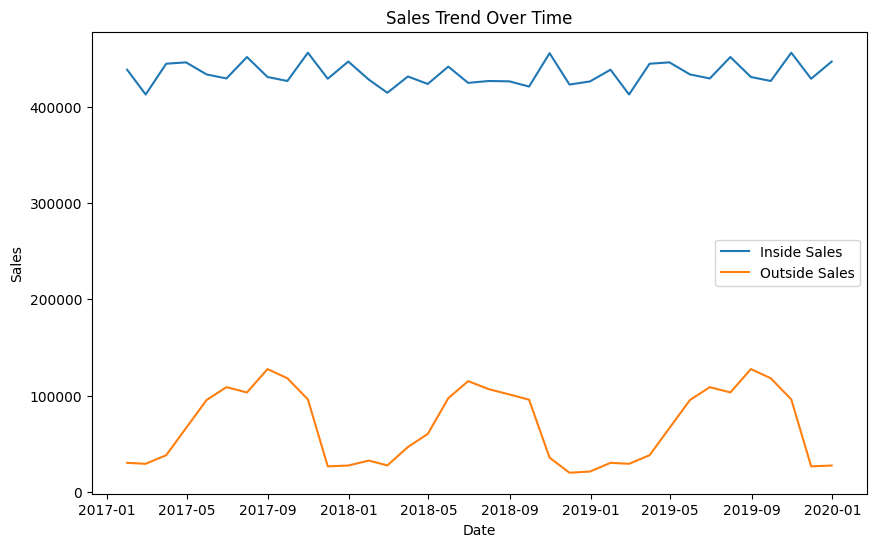

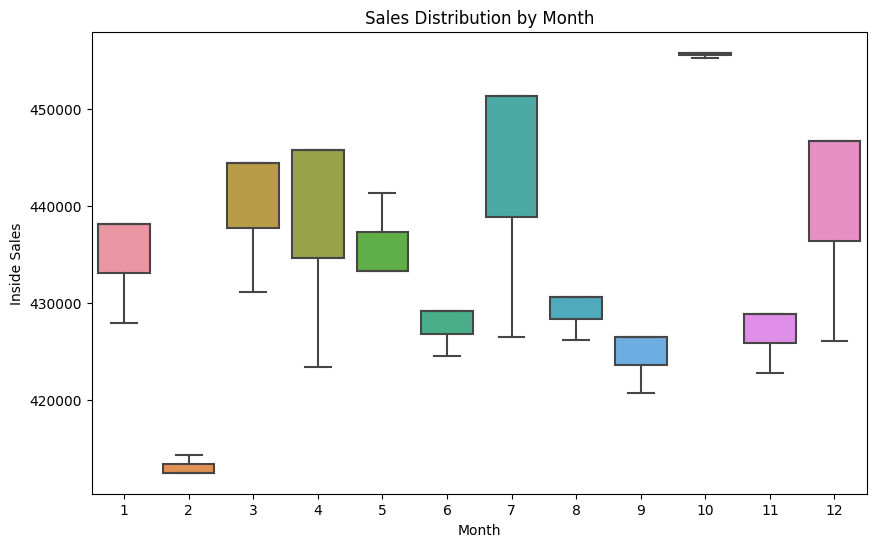

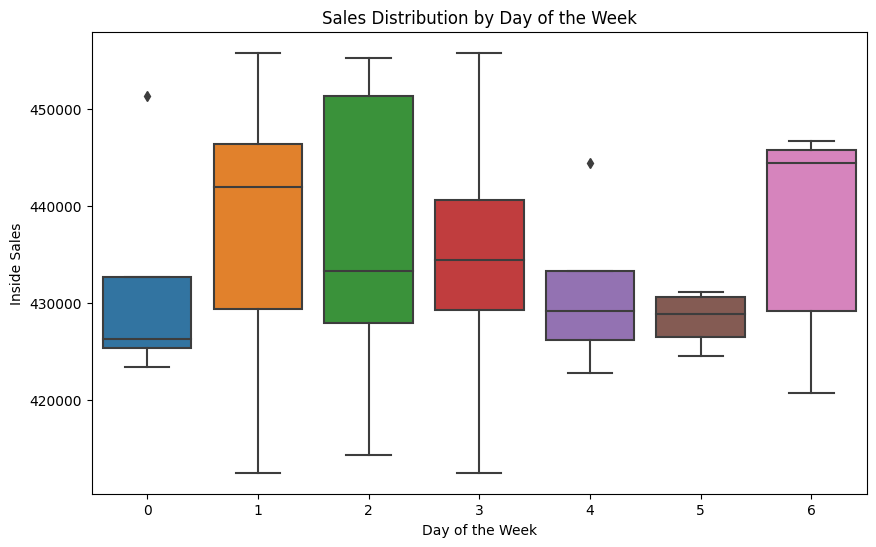

In [449]:
# Extracting date-related features from the index
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['dayofweek'] = df.index.dayofweek
df['quarter'] = df.index.quarter

# Visualizing sales trend over time
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(df.index, df['inside_sales'], label='Inside Sales')
plt.plot(df.index, df['outside_sales'], label='Outside Sales')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Visualizing sales distribution by month
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(x='month', y='inside_sales', data=df)
plt.title('Sales Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Inside Sales')
plt.show()

# Visualizing sales distribution by day of the week
plt.figure(figsize=(10,6))
sns.boxplot(x='dayofweek', y='inside_sales', data=df)
plt.title('Sales Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Inside Sales')
plt.show()


# Time Series Visualization

In [11]:
import statsmodels.api as sm


C:\Users\dhoom\AppData\Local\Temp\ipykernel_14428\85069728.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = pd.read_csv(r"C:\Users\dhoom\Desktop\new_through_06_09_separate_outsidee.csv", parse_dates=['date'], index_col='date')


<Axes: xlabel='date'>

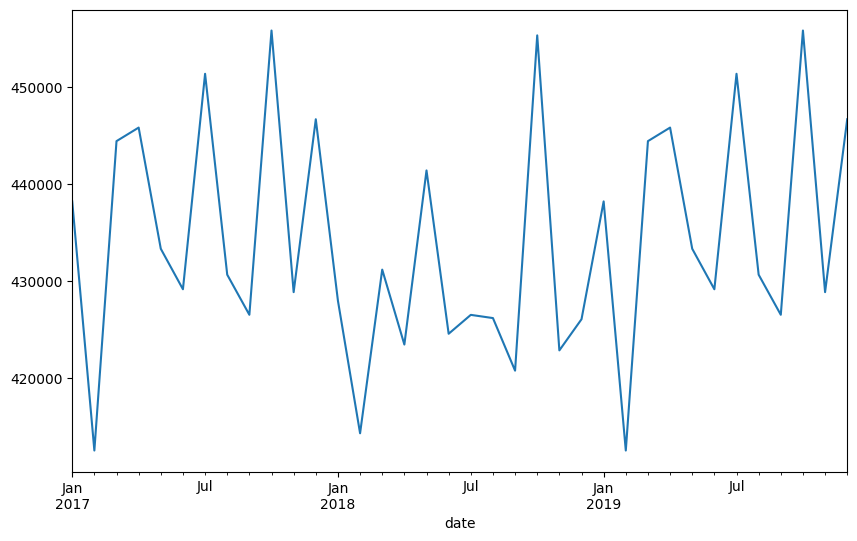

In [450]:
import pandas as pd

# Load the data
df = pd.read_csv(r"C:\Users\dhoom\Desktop\new_through_06_09_separate_outsidee.csv", parse_dates=['date'], index_col='date')

# Resample the data to monthly frequency
monthly_sales = df['inside_sales'].resample('M').sum()

# Visualize the data
monthly_sales.plot(figsize=(10, 6))



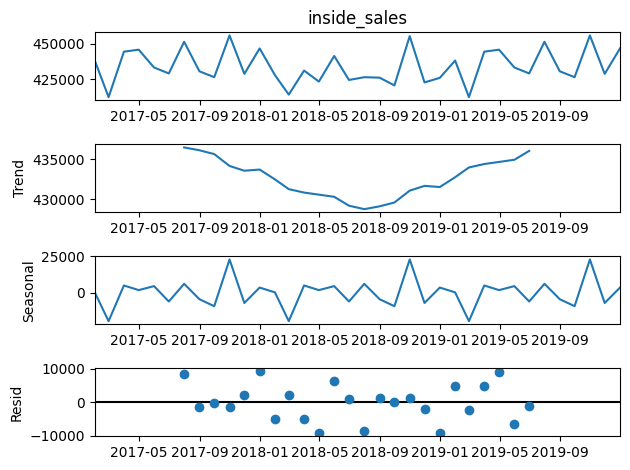

In [451]:

# Decompose the time series into trend, seasonal, and residual components
decomposition = sm.tsa.seasonal_decompose(monthly_sales, model='additive')
fig = decomposition.plot()



## Autoregressive Integrated Moving Average (ARIMA):

In [3]:
dfn = pd.read_csv(r"C:\Users\dhoom\Desktop\new_through_06_09_separate_outsidee.csv", parse_dates=['date'], index_col='date')


C:\Users\dhoom\AppData\Local\Temp\ipykernel_14428\3549474779.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dfn = pd.read_csv(r"C:\Users\dhoom\Desktop\new_through_06_09_separate_outsidee.csv", parse_dates=['date'], index_col='date')


In [5]:
df=dfn[:729]

In [8]:
monthly_sales = df['inside_sales'].resample('M').sum()


In [9]:
monthly_sales

date
2017-01-31    438188.47
2017-02-28    412476.64
2017-03-31    444410.16
2017-04-30    445808.20
2017-05-31    433301.28
2017-06-30    429121.00
2017-07-31    451360.76
2017-08-31    430625.88
2017-09-30    426486.36
2017-10-31    455826.54
2017-11-30    428823.12
2017-12-31    446669.15
2018-01-31    427932.79
2018-02-28    414256.51
2018-03-31    431148.90
2018-04-30    423414.02
2018-05-31    441385.51
2018-06-30    424528.23
2018-07-31    426477.77
2018-08-31    426147.07
2018-09-30    420719.80
2018-10-31    455325.97
2018-11-30    422812.50
2018-12-31    426026.28
Freq: M, Name: inside_sales, dtype: float64

In [12]:
# Fit an ARIMA model to the data
model = sm.tsa.ARIMA(monthly_sales, order=(1,1,1))
results = model.fit()



In [13]:
# Generate predictions for the next 12 months
forecast = results.predict(start=len(monthly_sales), end=len(monthly_sales)+11, dynamic=False)



# 2019 Sales Forecast

<Axes: >

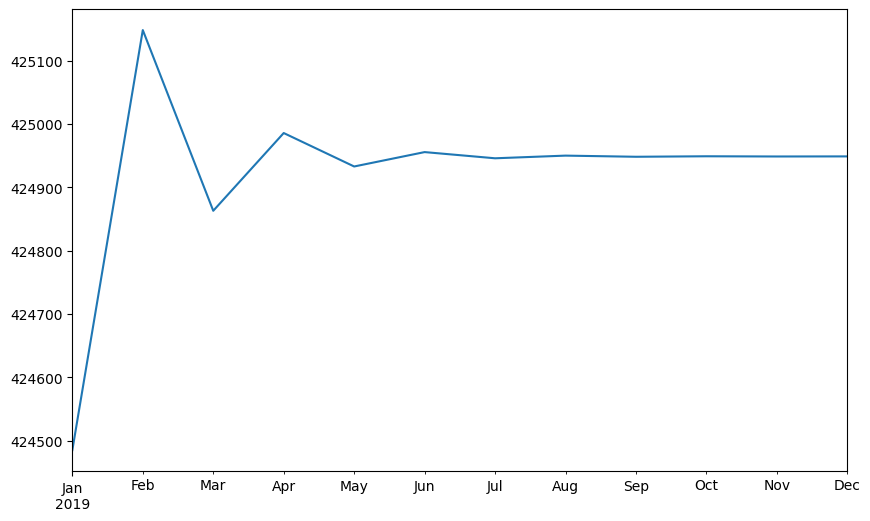

In [14]:
# Visualize the forecast
forecast.plot(figsize=(10, 6))

# 2019 Actual Sales

In [16]:
dfa=dfn[729:]

In [20]:
actual_sales = dfa['inside_sales'].resample('M').sum()


<Axes: xlabel='date'>

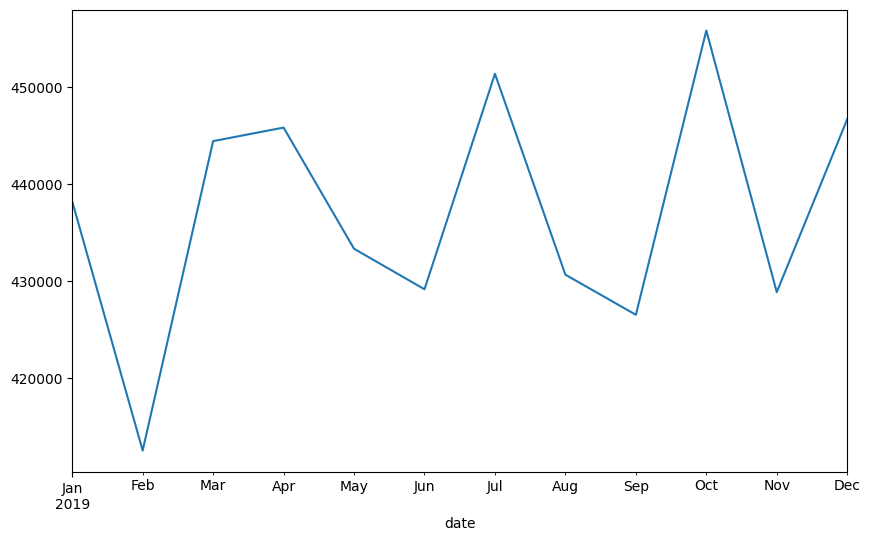

In [21]:
# Visualize the data
actual_sales.plot(figsize=(10, 6))

In [22]:
import numpy as np
# Calculate the mean absolute error (MAE)
mae = np.mean(np.abs(forecast - actual_sales))

# Calculate the mean squared error (MSE)
mse = np.mean((forecast - actual_sales)**2)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 14114.969872638656
MSE: 285328070.2206141
RMSE: 16891.6568228405


# Seasonal ARIMA (SARIMA):

In [30]:
monthly_sales = df['inside_sales'].resample('M').sum()


In [31]:
monthly_sales

date
2017-01-31    438188.47
2017-02-28    412476.64
2017-03-31    444410.16
2017-04-30    445808.20
2017-05-31    433301.28
2017-06-30    429121.00
2017-07-31    451360.76
2017-08-31    430625.88
2017-09-30    426486.36
2017-10-31    455826.54
2017-11-30    428823.12
2017-12-31    446669.15
2018-01-31    427932.79
2018-02-28    414256.51
2018-03-31    431148.90
2018-04-30    423414.02
2018-05-31    441385.51
2018-06-30    424528.23
2018-07-31    426477.77
2018-08-31    426147.07
2018-09-30    420719.80
2018-10-31    455325.97
2018-11-30    422812.50
2018-12-31    426026.28
Freq: M, Name: inside_sales, dtype: float64

In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the SARIMA model
order = (1, 1, 1)  # Set the order of the ARIMA component
seasonal_order = (1, 0, 0, 12)  # Set the order of the seasonal component
model = SARIMAX(monthly_sales, order=order, seasonal_order=seasonal_order)

# Fit the SARIMA model to the data
result = model.fit()

# Generate predictions from the SARIMA model
n_steps = 12  # Set the number of steps ahead to forecast
forecast = result.forecast(steps=n_steps)

# Print the forecasted values
print(forecast)

2019-01-31    424989.399040
2019-02-28    426185.320368
2019-03-31    425291.737814
2019-04-30    425693.914160
2019-05-31    425021.402579
2019-06-30    425621.847895
2019-07-31    425543.960022
2019-08-31    425560.233728
2019-09-30    425742.874322
2019-10-31    424565.315377
2019-11-30    425672.144766
2019-12-31    425562.880655
Freq: M, Name: predicted_mean, dtype: float64


# 2019 Sales Forecast

<Axes: >

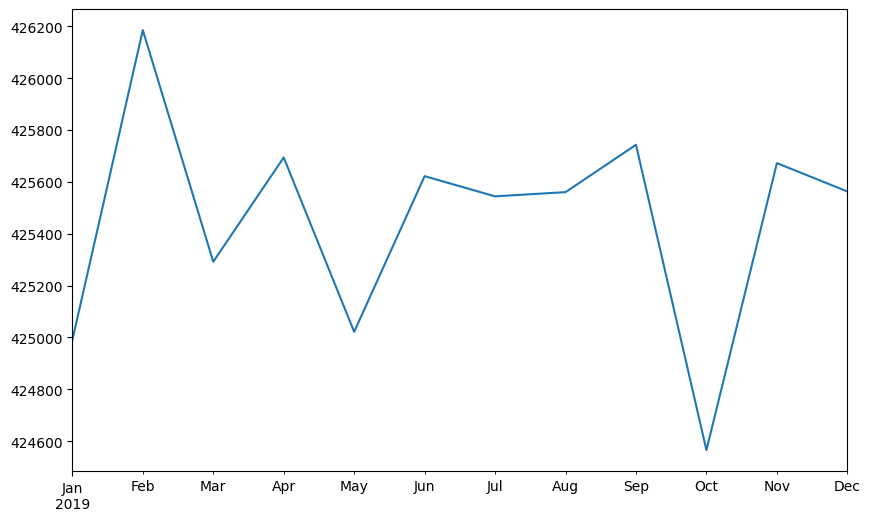

In [33]:
# Visualize the forecast
forecast.plot(figsize=(10, 6))

<Axes: xlabel='date'>

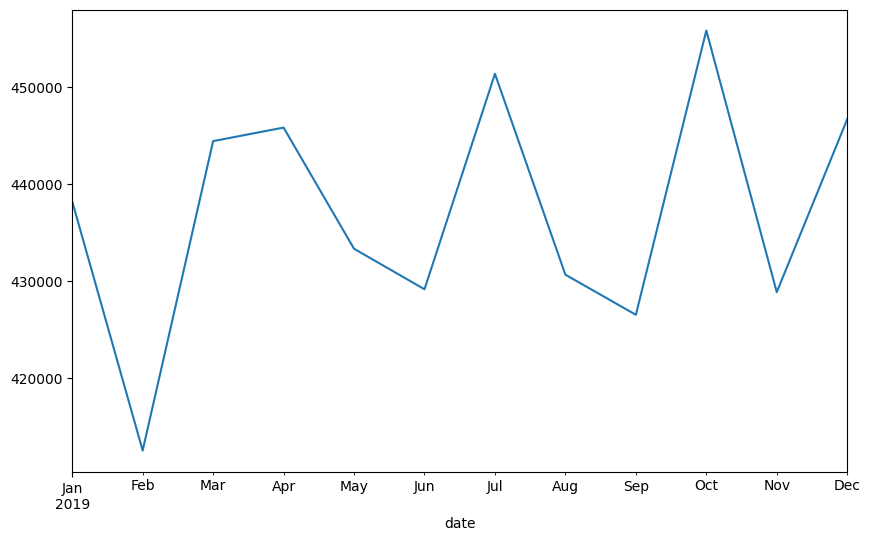

In [35]:
# Visualize the forecast
actual_sales.plot(figsize=(10, 6))

In [34]:
import numpy as np


# Calculate the mean absolute error (MAE)
mae = np.mean(np.abs(forecast - actual_sales))

# Calculate the mean squared error (MSE)
mse = np.mean((forecast - actual_sales)**2)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)


MAE: 13755.324167511295
MSE: 278202542.3892769
RMSE: 16679.40473725837


# Neural networks:

## Trained everyday sales

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from tensorflow import keras
from tensorflow.keras import layers

# Load the dataset
data = df
data=data.dropna()
# Set the target variable and features
target = 'inside_sales'
features = ['outside_sales', 'inside_covers', 'outside_covers', 'reserved_covers', 'walkin_covers', 'waitlist_covers', 'no_show_covers', 'no_show_parties', 'no_show_cover_rate']

# Split the data into training and testing sets
train_data = data.loc['2017-02-01':'2018-12-01']
test_data = dfa


# Create the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(features)]),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])



In [124]:
test_data=test_data.dropna()

In [120]:
# Compile the model with mean squared error loss and Adam optimizer
model.compile(loss='mse', optimizer='adam')

# Fit the model to the training data
history = model.fit(train_data[features], train_data[target], epochs=100, batch_size=32, verbose=0)



E:\Minconda_ins\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
E:\Minconda_ins\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


In [129]:
# Make predictions on the test data
test_data['predicted_sales'] = model.predict(test_data[features])

test_data=test_data.dropna()

12/12 [==============================] - 0s 2ms/step


E:\Minconda_ins\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
E:\Minconda_ins\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
C:\Users\dhoom\AppData\Local\Temp\ipykernel_14428\3931063958.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

R-squared: 0.35


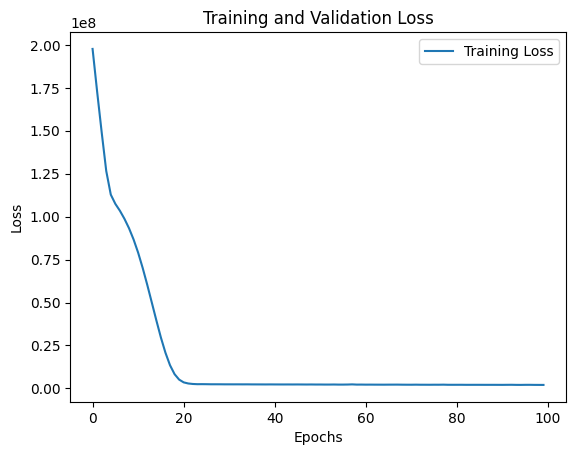

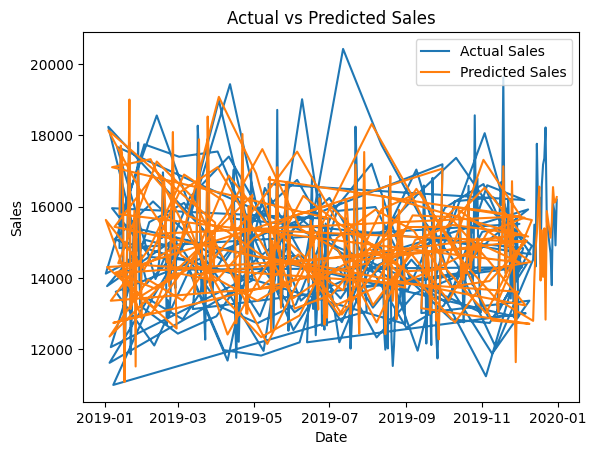

In [130]:
# Evaluate the model using R-squared
r2 = r2_score(test_data[target], test_data['predicted_sales'])
print(f'R-squared: {r2:.2f}')

# Plot the training and validation loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot the actual and predicted sales for the test data
plt.plot(test_data.index, test_data[target], label='Actual Sales')
plt.plot(test_data.index, test_data['predicted_sales'], label='Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()

In [131]:
test_data[target]

date
2019-02-01    13159.84
2019-03-01    12442.11
2019-04-01    12927.64
2019-05-01    14457.79
2019-06-01    15331.97
                ...   
2019-12-27    13799.65
2019-12-28    16099.48
2019-12-29    15889.64
2019-12-30    14915.91
2019-12-31    16199.59
Name: inside_sales, Length: 359, dtype: float64

In [132]:
test_data['predicted_sales']

date
2019-02-01    13530.254883
2019-03-01    14135.366211
2019-04-01    13923.918945
2019-05-01    15119.403320
2019-06-01    15723.747070
                  ...     
2019-12-27    15552.896484
2019-12-28    16549.294922
2019-12-29    16112.972656
2019-12-30    16139.409180
2019-12-31    16270.319336
Name: predicted_sales, Length: 359, dtype: float32

In [133]:
from sklearn.metrics import mean_squared_error
import math

mse = mean_squared_error(test_data[target], test_data['predicted_sales'])
rmse = math.sqrt(mse)

print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)


Mean Squared Error:  1870551.426445816
Root Mean Squared Error:  1367.6810397332472


## Trained everyMonth sales


In [382]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from tensorflow import keras
from tensorflow.keras import layers

# Load the dataset
data = df
data=data.dropna()

# Set the target variable and features
target = 'inside_sales'
features = ['outside_sales', 'inside_covers', 'outside_covers', 'reserved_covers', 'walkin_covers', 'waitlist_covers', 'no_show_covers', 'no_show_parties', 'no_show_cover_rate']

# Split the data into training and testing sets
train_data = data.loc['2017-02-01':'2018-12-01']
test_data = dfa


train_data = train_data.apply(lambda x: x.resample('M').sum())
test_data  = test_data.apply(lambda x: x.resample('M').sum())


# Create the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(features)]),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])



In [153]:
# Compile the model with mean squared error loss and Adam optimizer
model.compile(loss='mse', optimizer='adam')

# Fit the model to the training data
history = model.fit(train_data[features], train_data[target], epochs=100, batch_size=32, verbose=0)



E:\Minconda_ins\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
E:\Minconda_ins\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


In [154]:
# Make predictions on the test data
test_data['predicted_sales'] = model.predict(test_data[features])

test_data=test_data.dropna()

1/1 [==============================] - 0s 24ms/step


E:\Minconda_ins\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
E:\Minconda_ins\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


R-squared: -418.11


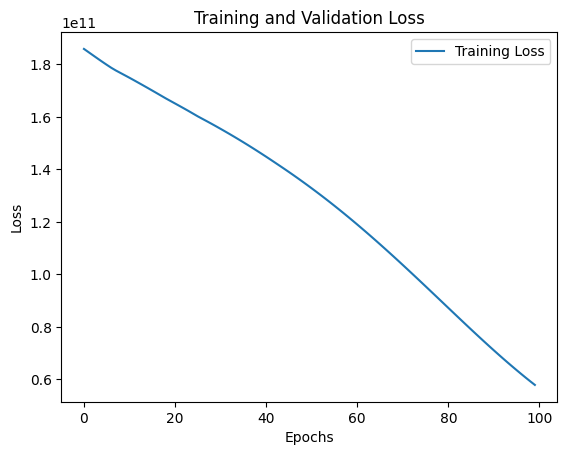

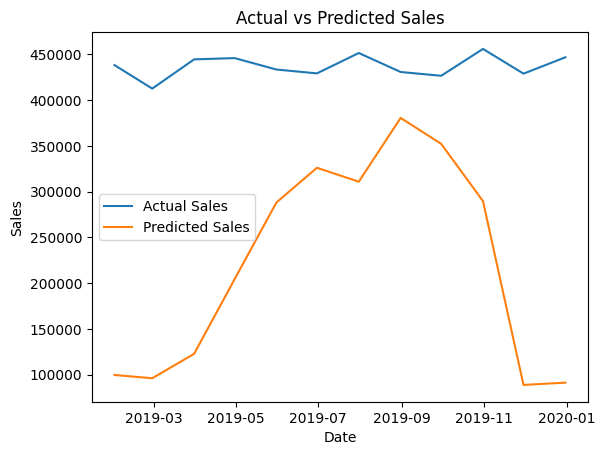

In [155]:
# Evaluate the model using R-squared
r2 = r2_score(test_data[target], test_data['predicted_sales'])
print(f'R-squared: {r2:.2f}')

# Plot the training and validation loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot the actual and predicted sales for the test data
plt.plot(test_data.index, test_data[target], label='Actual Sales')
plt.plot(test_data.index, test_data['predicted_sales'], label='Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()

# Merging Weather Data

In [251]:
weather=pd.read_csv(r"C:\Users\dhoom\Desktop\weather_2017-01-01_to_2019-06-30.csv")

In [252]:
weather

,date,apparent_temperature,humidity,precip_intensity_max,precip_max_time,precip_prob,precip_type,pressure,summary,temperature
0,2017-01-01,37.83,0.54,0.0000,05:01AM,0.00,none,1028.26,clear-night,37.83
1,2017-01-02,35.58,0.92,0.0242,03:00PM,0.79,rain,1027.98,rain,39.06
2,2017-01-03,41.50,0.94,0.0913,05:00PM,0.77,rain,1000.08,rain,43.19
3,2017-01-04,36.81,0.40,0.0176,12:00AM,0.00,rain,1002.55,clear-night,42.29
4,2017-01-05,27.11,0.48,0.0000,05:01AM,0.00,none,1014.61,cloudy,31.36
...,...,...,...,...,...,...,...,...,...,...
906,2019-06-26,84.66,0.44,0.0005,12:00AM,0.00,rain,1015.75,partly-cloudy-day,84.66
907,2019-06-27,86.30,0.34,0.0002,12:00AM,0.00,none,1018.94,partly-cloudy-day,86.30
908,2019-06-28,83.14,0.43,0.0000,05:01AM,0.00,none,1019.31,partly-cloudy-day,83.14
909,2019-06-29,77.20,0.77,0.0571,06:00PM,0.01,rain,1011.84,partly-cloudy-day,76.27


In [253]:
weather['date'] = pd.to_datetime(weather['date'])

In [254]:
weather.isnull().sum()

date                    0
apparent_temperature    0
humidity                0
precip_intensity_max    0
precip_max_time         0
precip_prob             0
precip_type             0
pressure                0
summary                 0
temperature             0
dtype: int64

In [255]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  911 non-null    datetime64[ns]
 1   apparent_temperature  911 non-null    float64       
 2   humidity              911 non-null    float64       
 3   precip_intensity_max  911 non-null    float64       
 4   precip_max_time       911 non-null    object        
 5   precip_prob           911 non-null    float64       
 6   precip_type           911 non-null    object        
 7   pressure              911 non-null    float64       
 8   summary               911 non-null    object        
 9   temperature           911 non-null    float64       
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 71.3+ KB


In [280]:
df = pd.read_csv(r"C:\Users\dhoom\Desktop\new_through_06_09_separate_outsidee.csv", parse_dates=['date'], index_col='date')


C:\Users\dhoom\AppData\Local\Temp\ipykernel_14428\1416713308.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = pd.read_csv(r"C:\Users\dhoom\Desktop\new_through_06_09_separate_outsidee.csv", parse_dates=['date'], index_col='date')


In [281]:
# merge the datasets based on the datetime column
merged_data = pd.merge(df, weather, on='date', how='left')

In [282]:
merged_data

,date,inside_sales,outside_sales,inside_covers,outside_covers,reserved_covers,walkin_covers,waitlist_covers,no_show_covers,no_show_parties,no_show_cover_rate,apparent_temperature,humidity,precip_intensity_max,precip_max_time,precip_prob,precip_type,pressure,summary,temperature
0,2017-02-01,13159.84,0.0,174.0,0,106.0,26.0,42.0,17.0,6.0,0.160377,39.55,0.66,0.0052,12:00PM,0.0,rain,1015.95,partly-cloudy-night,41.24
1,2017-03-01,12442.11,0.0,181.0,0,119.0,31.0,31.0,14.0,4.0,0.117647,65.76,0.61,0.0827,12:00PM,0.0,rain,997.46,clear-night,65.76
2,2017-04-01,12927.64,0.0,174.0,0,131.0,17.0,26.0,5.0,2.0,0.038168,44.38,0.69,0.0229,12:00AM,0.0,rain,1014.78,cloudy,45.85
3,2017-05-01,14457.79,0.0,191.0,0,138.0,25.0,28.0,4.0,2.0,0.028986,69.73,0.72,0.0000,05:01AM,0.0,none,1006.44,partly-cloudy-day,69.68
4,2017-06-01,15331.97,0.0,200.0,0,130.0,16.0,54.0,6.0,3.0,0.046154,75.22,0.39,0.0004,12:00AM,0.0,none,1012.01,partly-cloudy-day,75.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,2019-12-27,13799.65,0.0,196.0,0,133.0,7.0,56.0,2.0,1.0,0.015038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1090,2019-12-28,16099.48,0.0,210.0,0,139.0,18.0,53.0,10.0,3.0,0.071942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1091,2019-12-29,15889.64,0.0,203.0,0,130.0,1.0,72.0,10.0,5.0,0.076923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1092,2019-12-30,14915.91,0.0,202.0,2,144.0,16.0,44.0,8.0,4.0,0.055556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [283]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1093
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  1094 non-null   datetime64[ns]
 1   inside_sales          1094 non-null   float64       
 2   outside_sales         1094 non-null   float64       
 3   inside_covers         1077 non-null   float64       
 4   outside_covers        1094 non-null   int64         
 5   reserved_covers       1077 non-null   float64       
 6   walkin_covers         1077 non-null   float64       
 7   waitlist_covers       1077 non-null   float64       
 8   no_show_covers        1077 non-null   float64       
 9   no_show_parties       1077 non-null   float64       
 10  no_show_cover_rate    1077 non-null   float64       
 11  apparent_temperature  910 non-null    float64       
 12  humidity              910 non-null    float64       
 13  precip_intensity_m

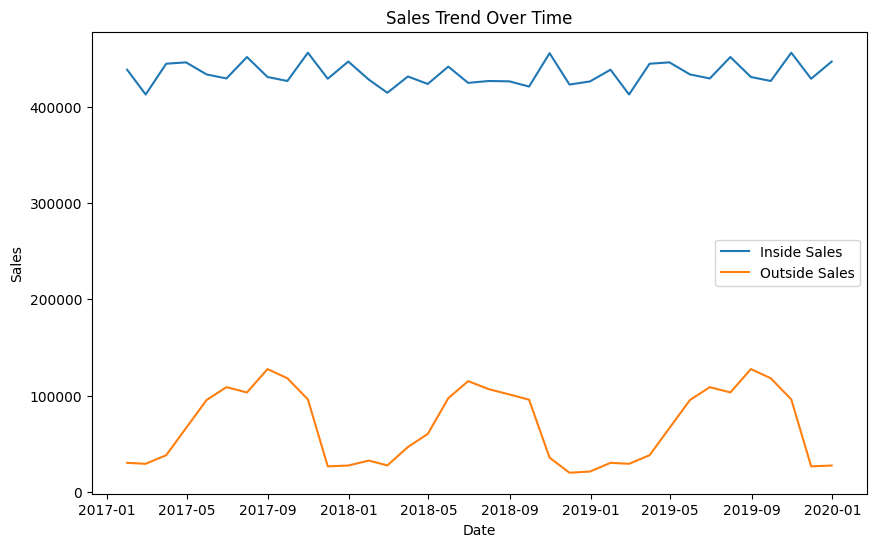

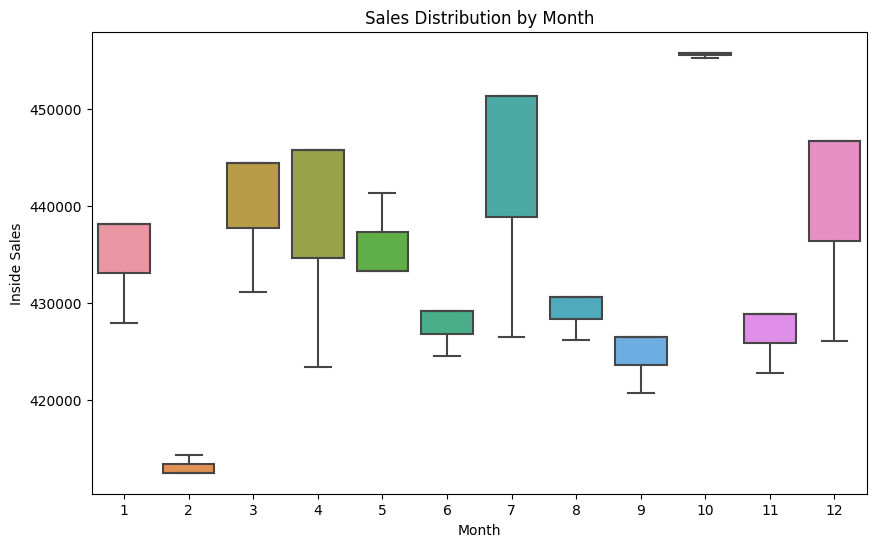

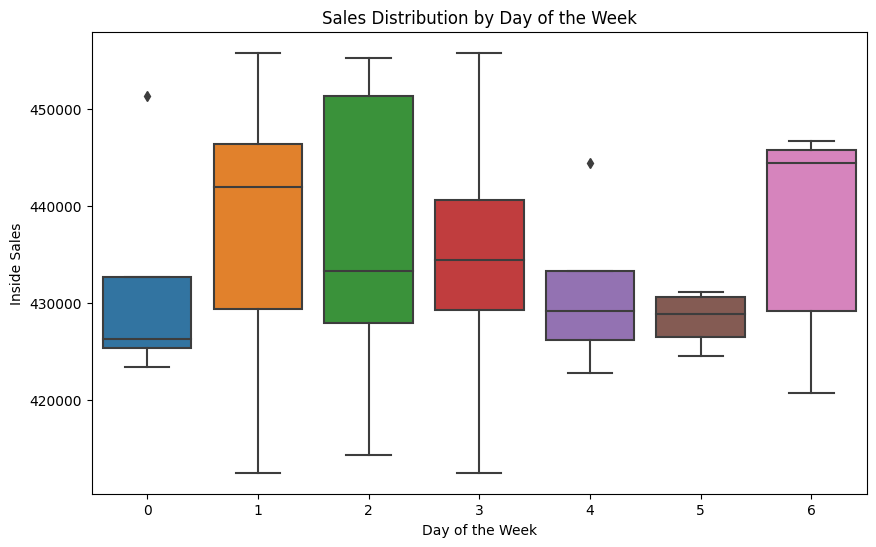

In [284]:
merged_data['month'] = merged_data['date'].dt.month
merged_data['days_week']=merged_data['date'].dt.dayofweek
merged_data['week_day'] = merged_data['date']. dt.day_name()
merged_data['day'] = merged_data['date'].dt.day


In [285]:
merged_data=merged_data.drop(['precip_max_time'], axis=1)

In [286]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['precip_type','summary','week_day']:
    merged_data[col] = le.fit_transform(merged_data[col])

In [288]:
merged_datas=merged_data

In [289]:
merged_data=merged_data.drop(['date'], axis=1)

In [290]:
merged_data=merged_data.dropna()

In [291]:
merged_data.isnull().sum()

inside_sales            0
outside_sales           0
inside_covers           0
outside_covers          0
reserved_covers         0
walkin_covers           0
waitlist_covers         0
no_show_covers          0
no_show_parties         0
no_show_cover_rate      0
apparent_temperature    0
humidity                0
precip_intensity_max    0
precip_prob             0
precip_type             0
pressure                0
summary                 0
temperature             0
month                   0
days_week               0
week_day                0
day                     0
dtype: int64

In [292]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,Y_test = train_test_split(merged_data.drop(['inside_sales'],axis=1),merged_data['inside_sales'],
                                                    test_size =0.4,random_state = 123)

# LinearRegression

In [293]:
from sklearn.linear_model import LinearRegression

# create a linear regression model
lin_model = LinearRegression()

# fit the model to the training data
lin_model.fit(X_train, Y_train)

# make predictions on the test data
y_pred = lin_model.predict(X_test)


In [294]:
# Evaluate the performance of the model
accuracy = lin_model.score(X_test, Y_test)
print("Accuracy:", accuracy)

Accuracy: 0.39557307726173474


# DecisionTreeRegressor

In [295]:
from sklearn.tree import DecisionTreeRegressor

# create a decision tree regression model
tree_model = DecisionTreeRegressor()

# fit the model to the training data
tree_model.fit(X_train, Y_train)

# make predictions on the test data
y_pred = tree_model.predict(X_test)


In [296]:
# Evaluate the performance of the model
accuracy = tree_model.score(X_test, Y_test)
print("Accuracy:", accuracy)

Accuracy: 0.15257645886366167


# RandomForestRegressor

In [297]:
from sklearn.ensemble import RandomForestRegressor

# create a random forest regression model
rf_model = RandomForestRegressor()

# fit the model to the training data
rf_model.fit(X_train, Y_train)

# make predictions on the test data
y_pred = rf_model.predict(X_test)


In [298]:
# Evaluate the performance of the model
accuracy = rf_model.score(X_test, Y_test)
print("Accuracy:", accuracy)

Accuracy: 0.44912351143384444


# SVR

In [299]:
from sklearn.svm import SVR

# create an SVR model
svr_model = SVR()

# fit the model to the training data
svr_model.fit(X_train, Y_train)

# make predictions on the test data
y_pred = svr_model.predict(X_test)


In [300]:
# Evaluate the performance of the model
accuracy = svr_model.score(X_test, Y_test)
print("Accuracy:", accuracy)

Accuracy: 0.001631030321497362


# GradientBoostingRegressor

In [301]:
from sklearn.ensemble import GradientBoostingRegressor

# create a gradient boosting regression model
gb_model = GradientBoostingRegressor()

# fit the model to the training data
gb_model.fit(X_train, Y_train)

# make predictions on the test data
y_pred = gb_model.predict(X_test)

# Evaluate the performance of the model
accuracy = gb_model.score(X_test, Y_test)
print("Accuracy:", accuracy)

Accuracy: 0.42779592196805094


# Multivariate Time Series Analysis

In [328]:
import matplotlib.pyplot as plt

from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tools.eval_measures import rmse
df=merged_datas
#df.set_index('date', inplace=True)

df = df.resample('M').sum()
# Select the columns for the multivariate time series analysis
cols = ['inside_sales', 'outside_sales','inside_covers', 'outside_covers','month','reserved_covers','days_week','day','outside_sales','no_show_parties','week_day','waitlist_covers']
# Split the data into training and testing sets
train = df[cols][:len(df)-12]
test = df[cols][len(df)-12:]

# Fit the VAR model to the training data
model = VAR(train)
model_fit = model.fit()


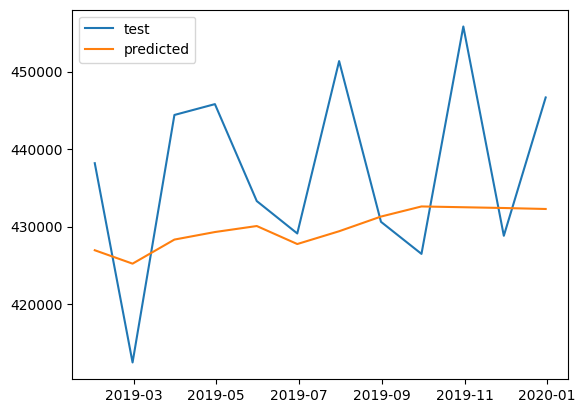

In [329]:
# Make predictions on the testing set
lag_order = model_fit.k_ar
predictions = model_fit.forecast(train.values[-lag_order:], steps=len(test))

# Convert the predictions to a pandas dataframe
pred_df = pd.DataFrame(predictions, index=test.index, columns=cols)


# Plot the predicted and actual values for the inside_sales variable
plt.plot(test['inside_sales'], label='test')
plt.plot(pred_df['inside_sales'], label='predicted')
plt.legend()
plt.show()



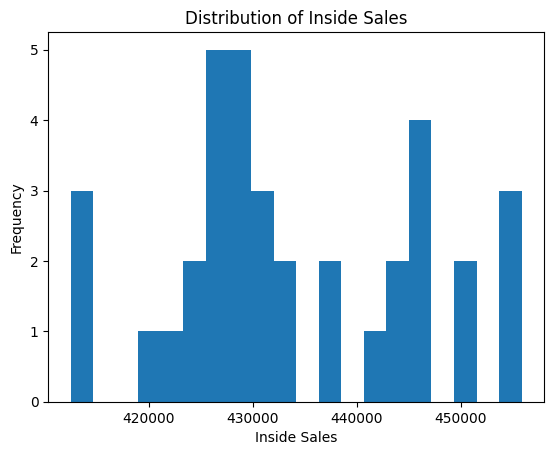

In [331]:
plt.hist(df['inside_sales'], bins=20)
plt.xlabel('Inside Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Inside Sales')
plt.show()


<Axes: >

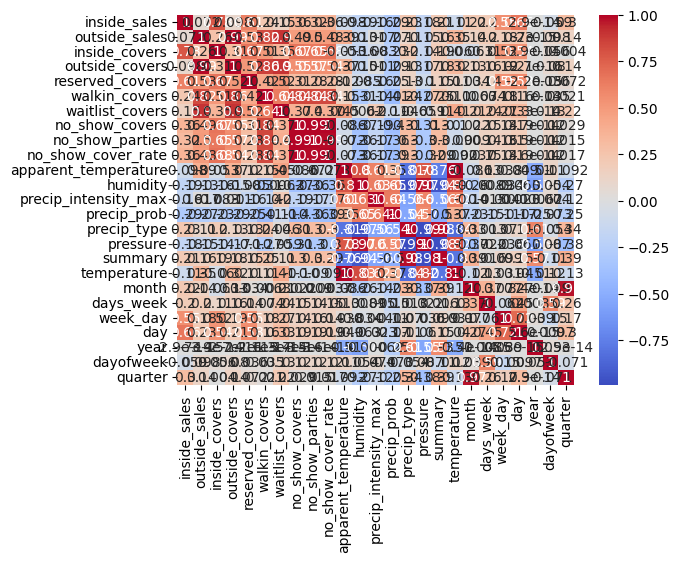

In [320]:
import seaborn as sns

# Create a correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix using seaborn heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


In [349]:
# Import necessary libraries
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Create a Lasso Regression model
lasso = Lasso(alpha=0.1)

# Fit the model on the training set
lasso.fit(X_train, Y_train)

# Predict on the testing set
y_pred = lasso.predict(X_test)

# Calculate mean squared error and R-squared score
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

E:\Minconda_ins\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.139e+06, tolerance: 1.519e+05
  model = cd_fast.enet_coordinate_descent(


In [350]:
# Evaluate the performance of the model
accuracy = lasso.score(X_train, Y_train)
print("Accuracy:", accuracy)

Accuracy: 0.43352271028360045


In [348]:
from sklearn.ensemble import RandomForestRegressor

# Split data into X and y
df1=dff.dropna()
df1.set_index('date', inplace=True)

X = df1.drop('inside_sales',axis=1)
#X = df1.drop('date',axis=1)
y = df1['inside_sales']

# Initialize a Random Forest model
rf = RandomForestRegressor()

# Fit the model on the data
rf.fit(X, y)

# Get feature importances
importances = pd.DataFrame({'feature':X.columns, 'importance':rf.feature_importances_})

# Sort the features by importance
importances = importances.sort_values('importance', ascending=False)

# Print the feature importances
print(importances)


              feature  importance
1       inside_covers    0.412500
3     reserved_covers    0.172716
4       walkin_covers    0.106347
8  no_show_cover_rate    0.088788
5     waitlist_covers    0.082393
6      no_show_covers    0.042609
7     no_show_parties    0.037239
0       outside_sales    0.031939
2      outside_covers    0.025469


# Stacked Classifier

In [431]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np


df=df.dropna()
df=df.drop(columns=['apparent_temperature','humidity','precip_intensity_max',	'precip_prob',	'precip_type',	'pressure',	'summary'	,'temperature'	,'month',	'days_week'	,'week_day',	'day'])


X_train=df.drop(columns=['inside_sales'])
X_train = X_train[:24]


In [432]:
y_train=df['inside_sales']
y_train = y_train[:24]


In [434]:

X_test=df.drop(columns=['inside_sales'])
y_test=df['inside_sales']
X_test = X_test[24:]
y_test = y_test[24:]

In [435]:


# First-level models
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42)
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the first-level models on the training set
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

# Make predictions on the test set using the first-level models
lr_pred = lr.predict(X_test)
rf_pred = rf.predict(X_test)
gb_pred = gb.predict(X_test)

# Create a second-level model
X_second_level_train = np.column_stack((lr_pred, rf_pred, gb_pred))
second_level_model = LinearRegression()
second_level_model.fit(X_second_level_train, y_test)

# Make predictions on the test set using the stacked model
X_second_level_test = np.column_stack((lr.predict(X_test), rf.predict(X_test), gb.predict(X_test)))
y_pred = second_level_model.predict(X_second_level_test)



In [436]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1131.8508846049524


In [437]:
mse

1131.8508846049524

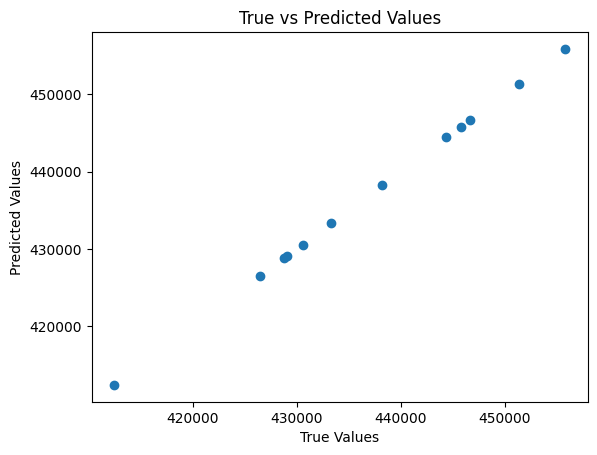

In [440]:
# Create a scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()